# Homework 4
## Analysis of Algorithms
## John Henry Mejia. 

Question numbers are shown inside the jupyter notebook. 

## Pre Work

In [206]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import tkinter as tk

**Things we need to do before we start on Question 1.** 

In [207]:
#function to get data from TSLA.csv into a dataframe
#from tokenize import Double #I'm not sure I ever use this but I'm keeping it just in case


def get_data():
    df = pd.read_csv('TSLA.csv')
    return df
tesladata = get_data()

#function to format the data in the dataframe "data" as integers
def format_data(data):
    data['Date'] = pd.to_numeric((pd.to_datetime(data['Date']) - pd.datetime(2021,10,18)).dt.days, downcast='integer') #To make date a coherent concept I decided to convert it to the number of days since the first date in the data set
    data['Close/Last'] = pd.to_numeric(data['Close/Last'].str.replace('[^-.0-9]', ''))
    data['Close/Last'] = data['Close/Last'].astype(float)
    
    return data.iloc[::-1].reset_index(drop=True)

tesladataformat = format_data(tesladata)

#this function returns the date in days given the days since October 18th, 2021
def get_date(tesladata, days):
    date = tesladata['Date'][days]
    return date


#function to print the data in the dataframe "data" 
def print_data(data):
    print(data)

print_data(tesladataformat)


#function to set close/last as the difference between the close/last and the previous close/last
def set_difference(data):
    data['Close/Last'] = data['Close/Last'].diff()
    data['Close/Last'][0] = 0
    return data

tesladata = set_difference(tesladataformat)

print_data(tesladata)



     Date  Close/Last
0       0      290.04
1       1      288.09
2       2      288.60
3       3      298.00
4       4      303.23
..    ...         ...
246   357      222.96
247   358      216.50
248   359      217.24
249   360      221.72
250   361      204.99

[251 rows x 2 columns]
     Date  Close/Last
0       0        0.00
1       1       -1.95
2       2        0.51
3       3        9.40
4       4        5.23
..    ...         ...
246   357       -0.11
247   358       -6.46
248   359        0.74
249   360        4.48
250   361      -16.73

[251 rows x 2 columns]


C:\Users\jhm\AppData\Local\Temp\ipykernel_87080\3946274495.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['Date'] = pd.to_numeric((pd.to_datetime(data['Date']) - pd.datetime(2021,10,18)).dt.days, downcast='integer') #To make date a coherent concept I decided to convert it to the number of days since the first date in the data set
C:\Users\jhm\AppData\Local\Temp\ipykernel_87080\3946274495.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Close/Last'] = pd.to_numeric(data['Close/Last'].str.replace('[^-.0-9]', ''))
C:\Users\jhm\AppData\Local\Temp\ipykernel_87080\3946274495.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close/

## Question 1 

In [208]:
#function that finds the max crossing subarray of the dataframe "data"
def find_max_crossing_subarray(data, low, mid, high):
    left_sum = -np.inf
    sum = 0
    max_left = 0
    max_right = 0
    for i in range(mid, low-1, -1):
        sum = sum + data['Close/Last'][i]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -np.inf
    sum = 0
    for j in range(mid+1, high+1):
        sum = sum + data['Close/Last'][j]
        if sum > right_sum:
            right_sum = sum
            max_right = j
    return (max_left, max_right, left_sum + right_sum)

#function that finds the max subarray of the dataframe "data"
def find_max_subarray(data, low, high):
    if high == low:
        return (low, high, data['Close/Last'][low])
    else:
        mid = (low + high) // 2
        (left_low, left_high, left_sum) = find_max_subarray(data, low, mid)
        (right_low, right_high, right_sum) = find_max_subarray(data, mid+1, high)
        (cross_low, cross_high, cross_sum) = find_max_crossing_subarray(data, low, mid, high)
        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low, left_high, left_sum)
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return (right_low, right_high, right_sum)
        else:
            return (cross_low, cross_high, cross_sum)


#call the function find_max_subarray on the dataframe "data"
print(find_max_subarray(tesladata, 0, len(tesladata)-1))

#This means that you should buy on day 2022-02-23 and sell on day  for the maximum profit.




(89, 116, 127.13999999999999)


## Question 2

Find-max-subarray returns the indices of the max subarray and the sum of the max subarray.
So, when all the numbers in the array are negative, the sum of the max subarray will be the biggest possible number (least negative) (The high and low indices will be the indeces of the least negative number). 

## Question 3

(89, 116, 127.13999999999999)
Buy on day 2022-02-23 and sell on day 2022-04-04 for a profit of $127.14


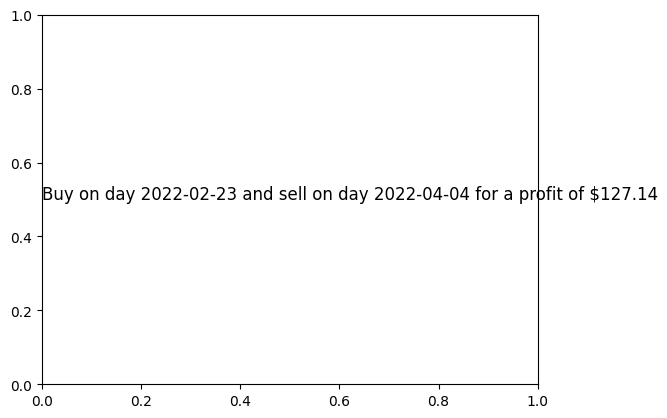

In [209]:
print(find_max_subarray(tesladata, 0, len(tesladata)-1))

#Print out the ideal investment strategy for the data in the dataframe "data"
def print_strategy(data):
    (low, high, sum) = find_max_subarray(data, 0, len(data)-1)
    print("Buy on day " + str((datetime.datetime.strptime('10-17-2021', '%m-%d-%Y') + datetime.timedelta(int(get_date(tesladata, low)))).date()) + " and sell on day " + str((datetime.datetime.strptime('10-18-2021', '%m-%d-%Y') + datetime.timedelta(int(get_date(tesladata, high)))).date()) + " for a profit of $" + str("%0.2f" % sum))


    plt.text(0.0, 0.5, "Buy on day " + str((datetime.datetime.strptime('10-17-2021', '%m-%d-%Y') + datetime.timedelta(int(get_date(tesladata, low)))).date()) + " and sell on day " + str((datetime.datetime.strptime('10-18-2021', '%m-%d-%Y') + datetime.timedelta(int(get_date(tesladata, high)))).date()) + " for a profit of $" + str("%0.2f" % sum), fontsize=12)
    plt.show()




print_strategy(tesladata)

## Question 4

The results of the brute force data is (89, 116, 127.13999999999999)
The brute force method took 13.833308 seconds to run.
This means that the brute force method is not efficient for large data sets.


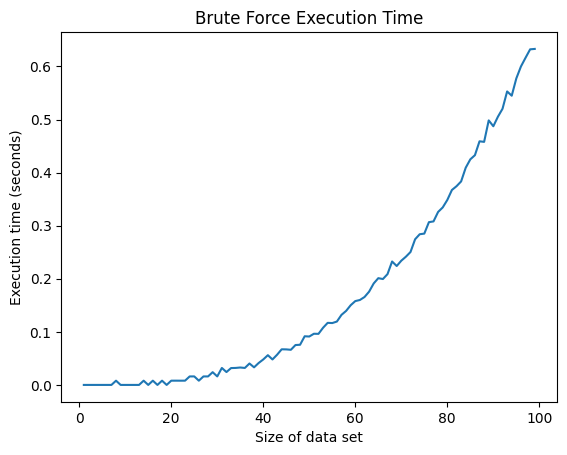

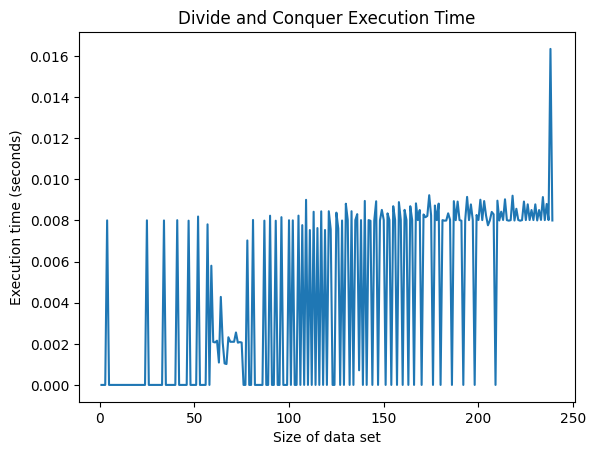

In [210]:
#Question 4

#function that finds the max subarray of the dataframe "data" using a brute force method
def find_max_subarray_brute_force(data):
    max_sum = -np.inf
    for i in range(len(data)):
        for j in range(i, len(data)):
            sum = 0
            for k in range(i, j+1):
                sum = sum + data['Close/Last'][k]
            if sum > max_sum:
                max_sum = sum
                low = i
                high = j
    return (low, high, max_sum)

#call the function find_max_subarray_brute_force on the dataframe "data"
start = datetime.datetime.now()
print("The results of the brute force data is " + str(find_max_subarray_brute_force(tesladata)))
end = datetime.datetime.now()
print("The brute force method took " + str((end-start).total_seconds()) + " seconds to run.")
print("This means that the brute force method is not efficient for large data sets.")
#As you can see, this takes around 10 seconds to run on my computer but it does give the same answer as the divide and conquer method.


#Function to plot execution time of the brute force method as a function of the size of the data set
def plot_brute_force_execution_time():
    x = []
    y = []
    for i in range(1, 100):
        data = tesladata[0:i]
        start = datetime.datetime.now()
        find_max_subarray_brute_force(data)
        end = datetime.datetime.now()
        x.append(i)
        y.append((end-start).total_seconds())
    plt.plot(x, y)
    plt.title("Brute Force Execution Time")
    plt.xlabel('Size of data set')
    plt.ylabel('Execution time (seconds)')
    plt.show()

#function to plot execution time of the divide and conquer method as a function of the size of the data set
def plot_divide_and_conquer_execution_time():
    x = []
    y = []
    for i in range(1, 240):
        data = tesladata[0:i]
        start = datetime.datetime.now()
        find_max_subarray(data, 0, len(data)-1)
        end = datetime.datetime.now()
        x.append(i)
        y.append((end-start).total_seconds())
    plt.plot(x, y)
    plt.title("Divide and Conquer Execution Time")
    plt.xlabel('Size of data set')
    plt.ylabel('Execution time (seconds)')
    plt.show()

plot_brute_force_execution_time()
plot_divide_and_conquer_execution_time()    